In [6]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("AAPL.csv")

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,133.540040,134.900455,132.151897,133.574348,133.259364,9.263210e+07
std,10.992726,10.941530,11.051847,11.042358,11.201795,2.965914e+07
min,109.110001,110.680000,107.320000,108.769997,108.074875,4.639770e+07
25%,124.580002,126.160004,123.129997,125.059998,124.783043,7.228260e+07
50%,132.360001,133.889999,131.070007,132.050003,131.608932,8.722280e+07
75%,143.750000,144.899994,142.660004,144.500000,144.283829,1.077601e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,1.925415e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [23]:
from datetime import datetime

X = np.asarray(df['Date']).reshape(-1, 1)
X = [datetime.timestamp(datetime.strptime(x[0], "%Y-%M-%d")) 
    for x in X]
X = np.asarray(X).reshape(-1, 1)
# xi = []
# for x in X:
#     x = datetime(x)
#     xi.append(x)

y = df['Close']
r = LinearRegression()
r = r.fit(X, y)


In [26]:
xi = [[1.61187256e+09]]
yp = r.predict(xi)
yp

array([136.71745237])

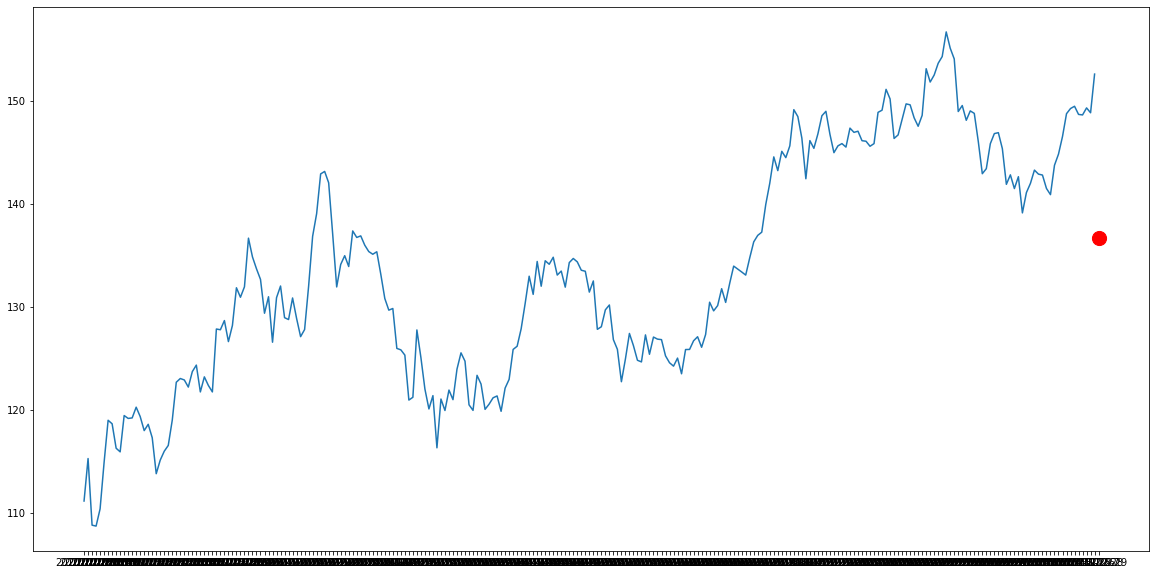

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline 

xid = datetime.fromtimestamp(xi[0][0])
xid = xid.strftime("%Y-%M-%d")
fig = plt.figure(figsize=(20, 10))
plt.plot(df["Date"], y)
plt.scatter(xid, yp, s=200, color='red')
plt.show()

In [39]:
X = df[["Date", "Open", "Close", "High", "Low"]]
ts = [datetime.timestamp(datetime.strptime(x, "%Y-%M-%d")) 
    for x in df["Date"]]
X["Date"] = ts

r.fit(X, y)

LinearRegression()

In [51]:
xi = np.asarray(X.iloc[110]).reshape(1, -1)
yp = r.predict(xi)

In [52]:
print(f"Predicted value {yp} for {xi}")
print(f"Real value {y[0]} for {xi}")

Predicted value [130.360001] for [[1.61005704e+09 1.28949997e+02 1.30360001e+02 1.30389999e+02
  1.28520004e+02]]
Real value 111.199997 for [[1.61005704e+09 1.28949997e+02 1.30360001e+02 1.30389999e+02
  1.28520004e+02]]
